In [2]:
from pathlib import Path

import matplotlib.patches as patches
from natsort import natsorted
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from brokenaxes import brokenaxes
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter, MaxNLocator
from brokenaxes import brokenaxes
import glob


def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    # golden_ratio = (5**.5 - 1) / 2
    golden_ratio = 0.61803398875

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def custom_formatter(x, pos):
    # x -= 500e3
    if x >= 1e6:  # For values 1 Million and above
        return f'{x*1e-6}M'
    elif x >= 1e3:  # For values 1 Thousand and above
        return f'{x*1e-3}k'
    return str(x)


# plt.style.use('seaborn-v0_8-whitegrid')
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
width = 361.34999

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    # "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)
plt.rcParams['agg.path.chunksize'] = 100000

In [1]:
# PATH_WINDOWS=r"/home/mahmoud/Downloads/CSVs"
# PATH_WINDOWS = r"D:\OneDrive\OneDrive - uniroma1.it\Università\Tesi Master\Videos\CSVs"
PATH_WINDOWS = r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs"



## Data

In [47]:
pretrain_data = pd.read_csv(fr'{PATH_WINDOWS}/pretrain_racetrack_16_actions_1_score.csv')
experimental_data_16_acts_pretrained = pd.read_csv(fr'{PATH_WINDOWS}/16_actions_racetrack_real_vpp_from_area_sim_pretrained_1_score.csv')

experimental_data_16_acts_pretrained = experimental_data_16_acts_pretrained.sort_values(by='Step')
experimental_data_16_acts_pretrained = experimental_data_16_acts_pretrained[experimental_data_16_acts_pretrained['Step'] > 5000]
experimental_data_16_acts_pretrained = experimental_data_16_acts_pretrained[experimental_data_16_acts_pretrained['Step'] < 272600]

In [48]:
experimental_data_16_acts = pd.read_csv(fr'{PATH_WINDOWS}/16_actions_racetrack_real_vpp_from_area_02_score.csv')
experimental_data_16_acts = experimental_data_16_acts.sort_values(by='Step')

In [49]:
experimental_data_32_acts = pd.read_csv(fr'{PATH_WINDOWS}/32_action_real_score.csv')
experimental_data_32_acts = experimental_data_32_acts.sort_values(by='Step')

In [50]:
experimental_data_shit = pd.read_csv(fr'{PATH_WINDOWS}/32_acts_shit.csv')
experimental_data_shit = experimental_data_shit.sort_values(by="Step")

In [51]:
exp_data_continous = pd.read_csv(fr'{PATH_WINDOWS}/vascular_real_continous_8_frequencies_amplitude_parallel_4_score.csv')
exp_data_continous = exp_data_continous.sort_values(by='Step')

In [52]:
exp_data_continous_2 = pd.read_csv(fr'{PATH_WINDOWS}/vascular_real_continous_8_frequencies_parallel_3_score.csv')
exp_data_continous_2 = exp_data_continous_2.sort_values(by='Step')

In [53]:
exp_data_continous_3 = pd.read_csv(fr'{PATH_WINDOWS}/vascular_real_continous_6_largemodel_score.csv')
exp_data_continous_3 = exp_data_continous_3.sort_values(by='Step')

In [54]:
exp_data_sweeping = pd.read_csv(fr'{PATH_WINDOWS}/vascular_real_sweeping_3_score.csv')
exp_data_sweeping = exp_data_sweeping.sort_values(by='Step')

In [55]:
exp_data_by_wall_2 = pd.read_csv(fr'{PATH_WINDOWS}/vascular_large_by_wall_2_score.csv')
exp_data_by_wall_2 = exp_data_by_wall_2.sort_values(by='Step')

In [56]:
exp_data_by_wall_3 = pd.read_csv(fr'{PATH_WINDOWS}/vascular_large_by_wall_3_score.csv')
exp_data_by_wall_3 = exp_data_by_wall_3.sort_values(by='Step')

In [57]:
exp_data_by_wall = pd.concat([exp_data_by_wall_2, exp_data_by_wall_3])

In [58]:
exp_data_by_wall_3 = pd.read_csv(fr'{PATH_WINDOWS}/vascular_large_by_wall_3_score.csv')
exp_data_by_wall_3 = exp_data_by_wall_3.sort_values(by='Step')

## Plots

In [59]:
df = experimental_data_32_acts
df = experimental_data_16_acts
df = exp_data_continous

### 16 Acts

In [8]:
data = df["Value"]

# Compute exponentially weighted moving averages
alpha = 0.01
ewma = pd.Series(data).ewm(alpha=alpha).mean().tolist()
std = (pd.Series(data).rolling(window=50).std()/2).tolist()

# Plotting
fig = plt.figure(figsize=set_size(361.34999))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df['Step'], data, color='#2ca02c', alpha=0.3, linewidth=0.015)
ax.plot(df['Step'], ewma, label='Score', color='#2ca02c', linewidth=1)
ax.fill_between(df['Step'], 
                np.array(ewma) - np.array(std[:len(ewma)]), 
                np.array(ewma) + np.array(std[:len(ewma)]), color='#2ca02c', alpha=0.1)

# Add horizontal lines for target reached and crashed
ax.axhline(y=10, color='green', linestyle='--', label='Target Reached (Score 10)')
# ax.axhline(y=-2, color='orange', linestyle='--', label='Crashed (Score -2)')

# ax.set_title('RL Training: Real World', fontsize=18, fontweight='bold', pad=10)
ax.tick_params(axis='both', which='major',)

ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'nbins' as needed for the x-axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'nbins' as needed for the y-axis

ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax.set_xlabel('Steps', fontname='Arial',)
ax.set_ylabel('Reward', fontname='Arial',)
legend = ax.legend(loc='upper left')
legend.get_frame().set_edgecolor('none')
ax.set_ylim(-4, 12)
ax.grid(False)
fig.savefig('16_acts.png', format='png', bbox_inches='tight', dpi=900)

KeyError: 'Value'

## Transition Real Environment

### Line Plot

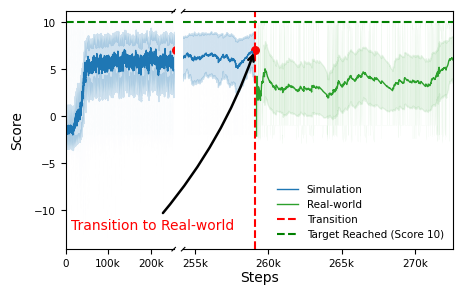

In [34]:
# Data for performance plots
sim_scores = pretrain_data['Value']
real_scores = experimental_data_16_acts_pretrained['Value']
real_2_scores = experimental_data_16_acts['Value']

# Compute exponentially weighted moving averages
alpha = 0.01
sim_ewma = pd.Series(sim_scores).ewm(alpha=alpha).mean().tolist()
real_ewma = pd.Series(real_scores).ewm(alpha=alpha).mean().tolist()
real_2_ewma = pd.Series(real_2_scores).ewm(alpha=alpha).mean().tolist()


# Compute standard deviations for shaded error bars
sim_std = (pd.Series(sim_scores).rolling(window=50).std()/2).tolist()
real_std = (pd.Series(real_scores).rolling(window=50).std()/2).tolist()

# Plotting
fig = plt.figure(figsize=set_size(361.34999))
axs = GridSpec(1, 1, figure=fig, height_ratios=[1,])

# Line plot with EWMA and shaded error bars (Top-left)
bax = brokenaxes(xlims=((0, pretrain_data['Step'].iloc[-1]-5000), (experimental_data_16_acts_pretrained['Step'].iloc[0]-5000, experimental_data_16_acts_pretrained['Step'].iloc[-1])), 
                 fig=fig, subplot_spec=axs[0, 0],
                 width_ratios=[0.2, 0.5], despine=False, wspace=0.05, d=0.005, )
bax.plot(pretrain_data['Step'], sim_scores, color='#1f77b4', alpha=0.3, linewidth=0.002)
bax.plot(pretrain_data['Step'], sim_ewma, label='Simulation', color='#1f77b4', linewidth=1)

bax.fill_between(pretrain_data['Step'], 
                       np.array(sim_ewma) - np.array(sim_std[:len(sim_ewma)]), 
                       np.array(sim_ewma) + np.array(sim_std[:len(sim_ewma)]), color='#1f77b4', alpha=0.2)

bax.plot(experimental_data_16_acts_pretrained['Step'], real_scores, color='#2ca02c', alpha=0.3, linewidth=0.045)
bax.plot(experimental_data_16_acts_pretrained['Step'], real_ewma, label='Real-world', color='#2ca02c', linewidth=1)
bax.fill_between(experimental_data_16_acts_pretrained['Step'], 
                       np.array(real_ewma) - np.array(real_std[:len(real_ewma)]), 
                       np.array(real_ewma) + np.array(real_std[:len(real_ewma)]), color='#2ca02c', alpha=0.1)

# Highlight the transition point
transition_point = pretrain_data['Step'].iloc[-1]
bax.axvline(x=transition_point, color='red', linestyle='--', label='Transition')
bax.scatter(transition_point, 7, color='red', s=30, marker='o')
bax.annotate('Transition to Real-world',
            xy=(transition_point, 7), 
            xytext=(transition_point - 12500, sim_scores.iloc[-1] - 10),
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.1', lw=1.8),
           color='red')

# Add horizontal lines for target reached and crashed
bax.axhline(y=10, color='green', linestyle='--', label='Target Reached (Score 10)')

bax.last_row[0].set_xticks([0, 100000, 200000])
bax.last_row[0].set_xticklabels([0, '100k', '200k'])
bax.last_row[1].set_xticks([ 255e3, 260e3, 265e3, 270e3])
bax.last_row[1].set_xticklabels(["255k", "260k","265k", '270k',])
leg = bax.legend(loc='lower right')
leg.get_frame().set_edgecolor("none")

bax.set_xlabel('Steps',)
bax.set_ylabel('Score',)

fig.savefig('transition_real_env.png', format='png', bbox_inches='tight', dpi=900)


### Distribution

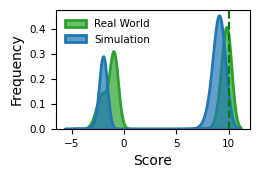

In [35]:
sim_scores = pretrain_data['Value']
real_scores = experimental_data_16_acts_pretrained['Value']
real_2_scores = experimental_data_16_acts['Value']

# Compute exponentially weighted moving averages
alpha = 0.01
sim_ewma = pd.Series(sim_scores).ewm(alpha=alpha).mean().tolist()
real_ewma = pd.Series(real_scores).ewm(alpha=alpha).mean().tolist()
real_2_ewma = pd.Series(real_2_scores).ewm(alpha=alpha).mean().tolist()


# Compute standard deviations for shaded error bars
sim_std = (pd.Series(sim_scores).rolling(window=50).std()/2).tolist()
real_std = (pd.Series(real_scores).rolling(window=50).std()/2).tolist()

# Plotting
fig = plt.figure(figsize=set_size(361.34999, 0.5))
axs = GridSpec(1, 1, figure=fig, height_ratios=[1,])

# Add horizontal lines for target reached and crashed
bax.axhline(y=10, color='green', linestyle='--', label='Target Reached (Score 10)')

bax.last_row[0].set_xticks([0, 100000, 200000])
bax.last_row[0].set_xticklabels([0, '100k', '200k'])
bax.last_row[1].set_xticks([ 255e3, 260e3, 265e3, 270e3])
bax.last_row[1].set_xticklabels(["255k", "260k","265k", '270k',])
bax.legend(loc='lower right', bbox_to_anchor=(1, 0.12))
bax.set_xlabel('Steps',)
bax.set_ylabel('Score',)

# Histogram for score distribution in simulation (Middle-left)
ax = fig.add_subplot(axs[0, 0])
color_dict = {"Simulation": "#1f77b4", "Real World": "#2ca02c"}
sns.kdeplot({"Simulation": sim_scores[40000:], "Real World":real_scores[300:]}, ax=ax, common_norm=False, common_grid=True, fill=True, alpha=0.7, 
            palette=color_dict, linewidth=2, bw_adjust=0.3, bw_method=0.25)
# ax.hist(sim_scores, bins=20, color='#1f77b4', alpha=0.7)
ax.axvline(x=10, color='green', linestyle='--')
# ax.axvline(x=-2, color='orange', linestyle='--')
# ax.set_title('Score Distribution', fontweight='bold', pad=20)
ax.set_xlabel('Score',)
ax.set_ylabel('Frequency',)
leg = ax.legend(["Real World", "Simulation"],
            loc='upper left')
leg.get_frame().set_edgecolor("none")

# ax.grid(True, linestyle='--', alpha=0.6)


# plt.show()
fig.savefig('transition_distr.png', format='png', bbox_inches='tight', dpi=900)

## Flow Strenght

In [6]:
path_2 = f"{PATH_WINDOWS}/4_out_flow/"
scores = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in scores]
df = pd.concat(dfs, axis=0)

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)

df_1_2 = df
df_2_2 = df_2

df_1_2 = df_1_2.sort_values(by='steps')
df_2_2 = df_2_2.sort_values(by='steps')

# Shifting extra
df_1_2 = df_1_2.shift(-1000)
df_1_2["steps"] = df_1_2["steps"] - df_1_2["steps"].min()



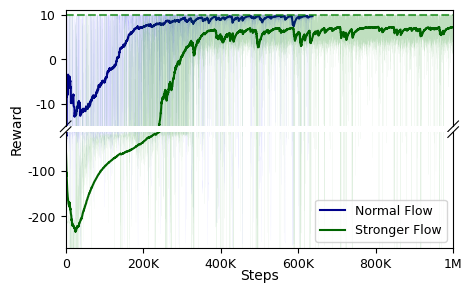

In [7]:
import glob

# path_reward = Path(rf"{PATH_WINDOWS}/PPO_4_out/reward_train.csv")
# path_target_reached = Path(rf'{PATH_WINDOWS}/PPO_4_out/rate_target_reached_train.csv').as_posix()

df_1_1 = pd.read_csv(path_reward)
df_2_1 = pd.read_csv(path_target_reached)

path_2 = f"{PATH_WINDOWS}/4_out_flow/"
scores = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in scores]
df = pd.concat(dfs, axis=0)

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)

df_1_2 = df
df_2_2 = df_2

df_1_2 = df_1_2.sort_values(by='steps')
df_2_2 = df_2_2.sort_values(by='steps')

# Shifting extra
df_1_2 = df_1_2.shift(-1000)
df_1_2["steps"] = df_1_2["steps"] - df_1_2["steps"].min()
path_2 = f"{PATH_WINDOWS}/4_out_more_by_wall/"
scores = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in scores]
df = pd.concat(dfs, axis=0)

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)

df_1_3 = df
df_2_3 = df_2

df_1_3 = df_1_3.sort_values(by='steps')
df_2_3 = df_2_3.sort_values(by='steps')


fig = plt.figure(figsize=set_size(361.34999))
bax = brokenaxes(xlims=((0, 1.e6),), 
                 ylims=((-270, -15), (-15, 11),), 
                #  ylims=((-270, 11),),
                 wspace=0.050,
                 hspace=0.050,
                #  width_ratios=[1,1], 
                 height_ratios=[1, 1],
                 despine=False, 
                 d=0.015)
alpha = 0.0015

# fig.subplots_adjust(bottom=0.05)  
bax.plot(df_1_2['steps'], df_1_2['reward'], alpha=0.25, color='blue', linewidth=0.05)
bax.plot(df_1_2['steps'], df_1_2['reward'].ewm(alpha=alpha).mean(), alpha=1, label='Normal Flow', color='darkblue')

bax.plot(df_1_3['steps'], df_1_3['reward'], alpha=0.25, color='green', linewidth=0.05)
bax.plot(df_1_3['steps'], df_1_3['reward'].ewm(alpha=alpha).mean(), alpha=1, label='Stronger Flow', color='darkgreen')

# bax.axhline(y=-2, color='red', linestyle='--', alpha=0.7, label="Collision")
bax.axhline(y=10, color='green', linestyle='--', alpha=0.7,)# label="")

bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps', )
bax.set_ylabel('Reward',)

bax.last_row[0].set_xticks([0, 200e3, 400e3, 600e3, 800e3, 1e6])
bax.last_row[0].set_xticklabels(['0', '200K', '400K', '600K', '800K', '1M'])

bax.first_col[0].set_yticks([-10, 0, 10])
bax.first_col[0].set_yticklabels(['-10', '0', '10'])

bax.first_col[1].set_yticks([-200, -100,])
bax.first_col[1].set_yticklabels(['-200', '-100'])

bax.legend(loc='lower right')
# bax.grid(False)
plt.savefig('4_out_score_flow_comparison_strenghtness_flow_separated', dpi=900, bbox_inches='tight')

## Pretrained

### Transfer mixed environment 

In [61]:
# Load the data from CSV files
mpl.rcParams["agg.path.chunksize"] = 100000
path = PATH_WINDOWS + "/mixed_10_envs"
tg_reach = sorted(glob.glob(path + '/*rate_target_reached_*.csv'))
scores = sorted(glob.glob(path + '/*reward*.csv'))
dfs = [pd.read_csv(f) for f in tg_reach]
scores = [pd.read_csv(f) for f in scores]
scores = pd.concat(scores, axis=0).sort_values(by='steps').dropna()
pretrain_data = scores.copy()

path = PATH_WINDOWS + "/pretrained_4_outs"
tg_reach = sorted(glob.glob(path + '/*rate_target_reached_*.csv'))
scores = sorted(glob.glob(path + '/*reward*.csv'))
dfs = [pd.read_csv(f) for f in tg_reach]
scores = [pd.read_csv(f) for f in scores]
scores = pd.concat(scores, axis=0).sort_values(by='steps').dropna()
real_data = scores.copy()

real_data["steps"] /= 10
real_data["steps"] = real_data["steps"] + max(pretrain_data["steps"])

# Extract scores and steps
sim_scores = pretrain_data['reward']
real_scores = real_data['reward']
sim_steps = pretrain_data['steps']
real_steps = real_data['steps']

# Compute exponentially weighted moving averages
alpha = 0.01
sim_ewma = pd.Series(sim_scores).ewm(alpha=alpha).mean().tolist()
real_ewma = pd.Series(real_scores).ewm(alpha=alpha).mean().tolist()

# Compute standard deviations for shaded error bars
sim_std = (pd.Series(sim_scores).rolling(window=50).std() / 2).tolist()
real_std = (pd.Series(real_scores).rolling(window=50).std() / 2).tolist()

# plt.style.use('seaborn-v0_8-darkgrid')

transition_point = sim_steps.iloc[-1]
break_point = transition_point - (transition_point - min(sim_steps)) * 0.005
# half_size = (max(real_steps) - min(real_steps) + transition_point - min(sim_steps)) / 2

# Plotting
fig = plt.figure(figsize=set_size(361.34999))
bax = brokenaxes(xlims=((0, break_point), (break_point, max(real_steps))), width_ratios=[1, 1], 
                 fig=fig, despine=False, wspace=0.05)

# Plot simulation data
bax.plot(sim_steps, sim_scores, color='#1f77b4', alpha=0.5, linewidth=0.0015)
bax.plot(sim_steps, sim_ewma, label='Pretraining (Simulation 10 Envs)', color='#1f77b4', linewidth=2)
bax.fill_between(sim_steps, 
                np.array(sim_ewma) - np.array(sim_std[:len(sim_ewma)]), 
                np.array(sim_ewma) + np.array(sim_std[:len(sim_ewma)]), color='#1f77b4', alpha=0.1)

# Plot real data
bax.plot(real_steps, real_scores, color='#2ca02c', alpha=0.3, linewidth=0.25)
bax.plot(real_steps, real_ewma, label='Adaptation (4 Out Channel)', color='#2ca02c', linewidth=2)
# bax.fill_between(real_steps, 
#                 np.array(real_ewma) - np.array(real_std[:len(real_ewma)]), 
#                 np.array(real_ewma) + np.array(real_std[:len(real_ewma)]), color='#2ca02c', alpha=0.1)

# Highlight the transition point
transition_point = sim_steps.iloc[-1]
y_trans_point = 1
bax.axvline(x=transition_point, color='red', linestyle='--', label='Transition')
bax.scatter(transition_point, y_trans_point, color='red', s=30, marker='o')
bax.annotate('Transition Point',
            xy=(transition_point, y_trans_point), 
            xytext=(transition_point - 7e4, y_trans_point - 30),
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.1', lw=1.8),
            color='red')


# Setting labels and titles
bax.set_xlabel('Steps')
bax.set_ylabel('Score')
leg = bax.legend(loc='lower left')
leg.get_frame().set_edgecolor('none')
# bax.grid(False, linestyle='--', alpha=0.6)

def format_func(value, tick_number):
    if value < 5e6:
        return f'{value/1e6:.0f}M'
    else:
        return f'{value/1e6:.2f}M'

for ax in bax.axs:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

for ax in bax.axs:
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

bax.last_row[1].set_xticks([5e6, 5.05e6, 5.10e6,])
ax.set_ylim(-180, 12)

# Show the plot
plt.grid(False)
# plt.show()
plt.savefig('transfer_racetrack', dpi=900, bbox_inches='tight')

C:\Users\M4\AppData\Local\Temp\ipykernel_37260\278931946.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat(scores, axis=0).sort_values(by='steps').dropna()


### Transfer Real Environment

In [62]:
pretrain_data = exp_data_by_wall.copy()
real_data = exp_data_sweeping.copy()

min_ = min(pretrain_data['Step'].min(), real_data['Step'].min())
pretrain_data['Step'] -= min_
real_data['Step'] -= min_

pretrain_data['Step']*=1.3
real_data['Step']*=1.3

# Extract scores and steps
sim_scores = pretrain_data['Value']
real_scores = real_data['Value']
sim_steps = pretrain_data['Step']
real_steps = real_data['Step']

# Compute exponentially weighted moving averages
alpha = 0.01
sim_ewma = pd.Series(sim_scores).ewm(alpha=alpha).mean().tolist()
real_ewma = pd.Series(real_scores).ewm(alpha=alpha).mean().tolist()

# Compute standard deviations for shaded error bars
sim_std = (pd.Series(sim_scores).rolling(window=50).std() / 2).tolist()
real_std = (pd.Series(real_scores).rolling(window=50).std() / 2).tolist()

# plt.style.use('seaborn-v0_8-darkgrid')

transition_point = sim_steps.iloc[-1]
break_point = transition_point - (transition_point - min(sim_steps)) * 0.005
# half_size = (max(real_steps) - min(real_steps) + transition_point - min(sim_steps)) / 2

# Plotting
fig = plt.figure(figsize=set_size(361.34999))
bax = brokenaxes(xlims=((0, break_point), (break_point, max(real_steps)-6e3)), width_ratios=[1, 1], 
                 fig=fig, despine=False, wspace=0.05)

# Plot simulation data
bax.plot(sim_steps, sim_scores, color='#1f77b4', alpha=0.5, linewidth=0.003)
bax.plot(sim_steps, sim_ewma, label='Pretraining (Simulation)', color='#1f77b4', linewidth=1)
bax.fill_between(sim_steps, 
                np.array(sim_ewma) - np.array(sim_std[:len(sim_ewma)]), 
                np.array(sim_ewma) + np.array(sim_std[:len(sim_ewma)]), color='#1f77b4', alpha=0.1)

# Plot real data
bax.plot(real_steps, real_scores, color='#2ca02c', alpha=0.3, linewidth=0.4)
bax.plot(real_steps, real_ewma, label='Real Environment', color='#2ca02c', linewidth=1)
# bax.fill_between(real_steps, 
#                 np.array(real_ewma) - np.array(real_std[:len(real_ewma)]), 
#                 np.array(real_ewma) + np.array(real_std[:len(real_ewma)]), color='#2ca02c', alpha=0.1)

# Highlight the transition point
transition_point = sim_steps.iloc[-1]
y_trans_point = 8
bax.axvline(x=transition_point, color='red', linestyle='--', label='Transition')
bax.scatter(transition_point, y_trans_point, color='red', s=30, marker='o')
bax.annotate('Transition to Real World',
            xy=(transition_point, y_trans_point), 
            xytext=(transition_point - 3.5e4, y_trans_point - 10),
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.1', lw=1.8),
            color='red')


# Setting labels and titles
bax.set_xlabel('Steps')
bax.set_ylabel('Score')
leg = bax.legend(loc='lower right')
leg.get_frame().set_edgecolor('none')
# bax.grid(False, linestyle='--', alpha=0.6)
# bax.axs[1].set_xticks([1.1e6, 1.2e6])

def format_func(value, tick_number):
    if value < 1e6:
        return f'{value/1e3:.0f}k'
    else:
        return f'{value/1e6:.2f}M'

for ax in bax.axs:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# for ax in bax.axs:
#     ax.tick_params(axis='x')
#     ax.tick_params(axis='y')


bax.set_ylim(-6.5, 12)
# Show the plot
plt.grid(False)
# plt.show()
plt.savefig('transfer_vascular', dpi=900, bbox_inches='tight')

## Train Ratio

In [63]:
# Plot
plt.rcParams['agg.path.chunksize'] = 10000

tr_1_1 = tr_10[tr_10['steps'] < 1.5e6]
tr_1_2 = tr_10[tr_10['steps'] > 1.5e6]

fig = plt.figure(figsize=set_size(361.34999))
bax = brokenaxes(xlims=((0, 1e6),(5e6, 7e6),),
                 ylims=((-250, -50),(-50, 11),),
                 wspace=0.050,
                 hspace=0.050,
                 width_ratios=[1, 0.4],
                 height_ratios=[1, 0.4], 
                 despine=False, 
                 d=0.015)
alpha = 0.008  # Increase alpha for faster plotting

# Calculate EWMA
tr_1_ewma = tr_10['reward'].ewm(alpha=alpha).mean()
tr_1_1_ewma = tr_1_1['reward'].ewm(alpha=alpha).mean()
tr_1_2_ewma = tr_1_2['reward'].ewm(alpha=alpha).mean()
tr_100_ewma = tr_100['reward'].ewm(alpha=alpha).mean()
tr_1000_ewma = tr_1000['reward'].ewm(alpha=alpha).mean()

bax.plot(tr_1_1['steps'], tr_1_1['reward'], alpha=0.25, color='blue', linewidth=0.4)
bax.plot(tr_1_1['steps'], tr_1_1_ewma, alpha=1, label='10', color='darkblue')

bax.plot(tr_1_2['steps'], tr_1_2['reward'], alpha=0.25, color='blue', linewidth=0.4)
bax.plot(tr_1_2['steps'], tr_1_2_ewma, alpha=1, color='darkblue')

bax.plot(tr_100['steps'], tr_100['reward'], alpha=0.25, color='green', linewidth=0.4)
bax.plot(tr_100['steps'], tr_100_ewma, alpha=1, label='100', color='darkgreen')

bax.plot(tr_1000['steps'], tr_1000['reward'], alpha=0.25, color='red', linewidth=0.4)
bax.plot(tr_1000['steps'], tr_1000_ewma, alpha=1, label='1000', color='darkred')

# Calculate 1/3 standard deviation
tr_1_std = tr_10['reward'].ewm(alpha=alpha).std() / 3
tr_100_std = tr_100['reward'].ewm(alpha=alpha).std() / 3
tr_500_std = tr_1000['reward'].ewm(alpha=alpha).std() / 3


# Plot filled area
bax.fill_between(tr_10['steps'], tr_1_ewma - tr_1_std, tr_1_ewma + tr_1_std, color='blue', alpha=0.02)
bax.fill_between(tr_100['steps'], tr_100_ewma - tr_100_std, tr_100_ewma + tr_100_std, color='green', alpha=0.02)
bax.fill_between(tr_1000['steps'], tr_1000_ewma - tr_500_std, tr_1000_ewma + tr_500_std, color='red', alpha=0.02)

bax.axhline(y=10, color='green', linestyle='--', alpha=0.7)

bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')
bax.first_col[0].set_yticks([-40, -30, -20, -10, 0, 10])

bax.first_col[0].set_yticklabels(['-40', '-30', '-20', '-10', '0', '10'])

bax.first_col[1].set_yticks([-200, -100,])
bax.first_col[1].set_yticklabels(['-200', '-100'])
# bax.set_title("Comparison Flow Strenght", fontname='Arial', fontsize=20)

bax.last_row[0].set_xticks([0, 200e3, 400e3, 600e3, 800e3])
bax.last_row[0].set_xticklabels(['0', '200K', '400K', '600K', "800k"])
bax.last_row[1].set_xticks([5.5e6, 6.5e6,])
bax.last_row[1].set_xticklabels(['5M', '7M',])


legend = bax.legend(loc='lower right', title='Train Ratio')
# legend.get_frame().set_edgecolor('none')
plt.savefig('train_ratios_comparison_racetrack.png', dpi=900, bbox_inches='tight')

NameError: name 'tr_10' is not defined

## Mixed Environments

### Imports

In [20]:
import numpy as np
import copy

def generate_bins(start, end, num_bins, base):
    log_bins = np.logspace(np.log10(start), np.log10(end), num_bins, base=base)
    log_bins = np.insert(log_bins, 0, 0)
    return log_bins

def generate_labels(bins):
    labels = []
    for i in range(len(bins)-1):
        labels.append(f"${bins[i]:.1f}$M$-{bins[i+1]:.1f}$M")
    return labels

In [23]:
from brokenaxes import brokenaxes

path = PATH_WINDOWS + "/mixed_10_envs"
tg_reach = sorted(glob.glob(path + '/*rate_target_reached_*.csv'))
scores = sorted(glob.glob(path + '/*reward*.csv'))
dfs = [pd.read_csv(f) for f in tg_reach]
scores = [pd.read_csv(f) for f in scores]
# df_score = [pd.read_csv(f) for f in score][0]

with open(path+"/env_order.txt", "r") as f:
    env_names = f.readlines()
    env_names = [env.strip()for env in env_names][1:-1]

path = PATH_WINDOWS + "/pretrained_4_outs"
tg_reach = sorted(glob.glob(path + '/*rate_target_reached_*.csv'))
scores = sorted(glob.glob(path + '/*reward*.csv'))
dfs = [pd.read_csv(f) for f in tg_reach]
scores = [pd.read_csv(f) for f in scores]
scores = pd.concat(scores, axis=0).sort_values(by='steps').dropna()
real_data = scores.copy()

real_data["steps"] /= 10
real_data["steps"] = real_data["steps"] + max(pretrain_data["Step"])

df_comb = pd.concat(dfs, axis=0)
df_comb.sort_values(by='steps', inplace=True)
df_comb.reset_index(drop=True, inplace=True)
df_comb.drop_duplicates(inplace=True)
df_comb['steps'] = df_comb['steps']
dfs_2 = [*dfs, df_comb]

color_dict = color_dict = {
    'Empty': '#1f77b4',
    '4 Squares': '#aec7e8',
    'Racetrack': '#ff7f0e',
    'Racetrack 2': '#ffbb78',
    'Vascular': '#2ca02c',
    'Vascular 2': '#98df8a',
    'Maze Easy': '#d62728',
    'Maze Medium': '#ff9896',
    'Maze Medium 2': '#9467bd',
    'Maze Hard': '#c5b0d5'
}

C:\Users\loren\AppData\Local\Temp\ipykernel_21188\962357662.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat(scores, axis=0).sort_values(by='steps').dropna()


In [91]:
dfs_comb = copy.deepcopy(dfs)
bins = generate_bins(1.2, 10, 6, 4)
labels = generate_labels(bins)
bins = [int(bin*1e6) for bin in bins]
print(bins, labels)
for i, df in enumerate(copy.deepcopy(dfs)):
    dfs_comb[i]['steps'] = pd.cut(df['steps'], bins=bins, labels=labels)
out = pd.concat(dfs_comb, axis=0, keys=env_names, names=['env', 'index'])
out.head()

[0, 1116019, 1440620, 1859632, 2400516, 3098720, 4000000] ['$0.0$M$-1.1$M', '$1.1$M$-1.4$M', '$1.4$M$-1.9$M', '$1.9$M$-2.4$M', '$2.4$M$-3.1$M', '$3.1$M$-4.0$M']


steps  rate_target_reached
env   index                                    
Empty 0      $0.0$M$-1.1$M                 0.13
      1      $0.0$M$-1.1$M                 0.13
      2      $0.0$M$-1.1$M                 0.24
      3      $0.0$M$-1.1$M                 0.20
      4      $0.0$M$-1.1$M                 0.20

In [92]:
scores = [score[score["steps"] < 4.5e6] for score in scores]

### Bar Plot

In [144]:
ax, fig = plt.subplots(figsize=(7,3.7))
color_dict = color_dict = {
    'Empty': '#1f77b4',
    '4 Squares': '#aec7e8',
    'Racetrack': '#ff7f0e',
    'Racetrack 2': '#ffbb78',
    'Vascular': '#2ca02c',
    'Vascular 2': '#98df8a',
    'Maze Easy': '#d62728',
    'Maze Medium': '#ff9896',
    'Maze Medium 2': '#9467bd',
    'Maze Hard': '#c5b0d5'
}
sns.boxplot(x='steps', y='rate_target_reached', data=out, hue='env', gap=0.15, palette=color_dict, showfliers=False)
plt.tick_params(axis='both', which='major')
plt.xticks(range(len(labels)), labels=labels)
plt.xlabel('Steps')
plt.ylabel('Rate Target Reached')
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
leg = plt.legend(title='Environments', loc='lower right',)
leg.get_frame().set_edgecolor("none")

plt.savefig('rate_target_reached_box_10_envs', dpi=900, bbox_inches='tight')

### Line Plot

C:\Users\loren\AppData\Local\Temp\ipykernel_21188\2200058252.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat(scores, axis=0).sort_values(by='steps').dropna()


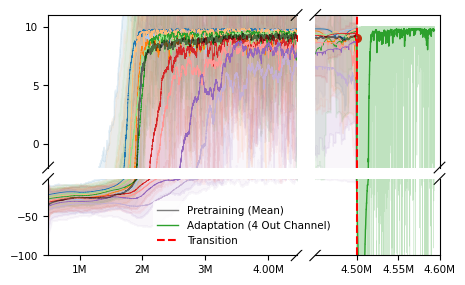

In [58]:
path = PATH_WINDOWS + "/mixed_10_envs"
tg_reach = sorted(glob.glob(path + '/*rate_target_reached_*.csv'))
scores = sorted(glob.glob(path + '/*reward*.csv'))
dfs = [pd.read_csv(f) for f in tg_reach]
scores = [pd.read_csv(f) for f in scores]

span = 1000
fig = plt.figure(figsize=set_size(364.999))
ax = brokenaxes(
    ylims=((-100, -2), (-2, 11)), height_ratios=(1, 0.5), despine=False, fig=fig, xlims=((500e3, 4.45e6), (4.45e6, 4.590e6),),
    width_ratios=(1, 0.5),
    hspace=0.1, wspace=0.1
)
alpha = 0.002
max_  = 0

all_rewards_df = pd.concat(scores, axis=0)
all_rewards_df.sort_values(by='steps', inplace=True)
all_rewards_df.reset_index(drop=True, inplace=True)
all_rewards_df["ewma"] = all_rewards_df["reward"].ewm(span=span*10).mean()
all_rewards_df = all_rewards_df[all_rewards_df["steps"] < 4.5e6]

for i, (score, name) in enumerate(zip(scores, env_names)):
    df = pd.DataFrame(score)  # Assuming score is a dictionary with 'steps' and 'reward'
    df = df[df['steps'] < 4.5e6]

    forward_ewma = df["reward"].ewm(alpha=alpha).mean()
    backward_ewma = df["reward"][::-1].ewm(alpha=alpha).mean()[::-1]
    ewma = (forward_ewma + backward_ewma) / 2

    # Calculate variability (standard deviation)
    std_dev = df["reward"].rolling(window=span).std() / 2

    ax.plot(
        df["steps"], df["reward"], alpha=0.03, color=color_dict[name], linewidth=0.001
    )
    ax.plot(df["steps"], ewma, alpha=1, color=color_dict[name], linewidth=0.6)

    # Shaded area for variability
    ax.fill_between(
        df["steps"], ewma - std_dev, ewma + std_dev, color=color_dict[name], alpha=0.1
    )
    max_ = max(max_ , df["steps"].max())
    sim_steps = df["steps"]

ax.plot(all_rewards_df["steps"], all_rewards_df["ewma"], alpha=0.5, label='Pretraining (Mean)', color='black', linewidth=1)

path = PATH_WINDOWS + "/pretrained_4_outs"
tg_reach = sorted(glob.glob(path + '/*rate_target_reached_*.csv'))
scores = sorted(glob.glob(path + '/*reward*.csv'))
dfs = [pd.read_csv(f) for f in tg_reach]
scores = [pd.read_csv(f) for f in scores]
scores = pd.concat(scores, axis=0).sort_values(by='steps').dropna()
real_data = scores.copy()

real_data["steps"] /= 10
real_data["steps"] = real_data["steps"] + max_

real_scores = real_data['reward']
real_steps = real_data['steps']

# Compute exponentially weighted moving averages
real_ewma = pd.Series(real_scores).ewm(alpha=alpha).mean().tolist()

# Compute standard deviations for shaded error bars
real_std = (pd.Series(real_scores).rolling(window=50).std() / 2).tolist()

transition_point = max_
# break_point = transition_point - (transition_point - min(sim_steps)) * 0.005
# half_size = (max(real_steps) - min(real_steps) + transition_point - min(sim_steps)) / 2

# Plot real data
ax.plot(real_steps, real_scores, color='#2ca02c', alpha=0.3, linewidth=0.25)
ax.plot(real_steps, real_ewma, label='Adaptation (4 Out Channel)', color='#2ca02c', linewidth=1)

# Highlight the transition point
transition_point = sim_steps.iloc[-1]
y_trans_point = 9
ax.axvline(x=transition_point, color='red', linestyle='--', label='Transition')
ax.scatter(transition_point, y_trans_point, color='red', s=30, marker='o')
# ax.annotate('Transition Point',
#             xy=(transition_point, y_trans_point), 
#             xytext=(5e6, 1),
#             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.1', lw=1.8),
#             color='red')


def format_func(value, tick_number):
    if value < 4e6:
        return f'{value/1e6:.0f}M'
    else:
        return f'{value/1e6:.2f}M'

for x in ax.axs:
    x.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

for x in ax.axs:
    x.tick_params(axis='x')
    x.tick_params(axis='y')

ax.last_row[1].set_xticks([4.5e6, 4.55e6, 4.60e6,])
ax.first_col[0].set_yticks([0, 5, 10])
# ax.set_ylim(-180, 12)

# Show the plot
plt.grid(False)
# plt.savefig('transfer_racetrack', dpi=900, bbox_inches='tight')

# ax.set_xlabel("Steps",)
# ax.set_ylabel("Reward",)

# ax.first_col[0].set_major_locator(MaxNLocator(nbins=3))
# ax.first_col[0].set_yticks([0, 2, 4, 6, 8, 10])
leg = ax.legend(loc="lower center")
leg.get_frame().set_edgecolor("none")
plt.savefig("mixed_10_envs_score_1", dpi=300, bbox_inches="tight")
plt.show()

In [49]:
real_data["steps"].max()

4593793.7

# PPO vs Dreamer

## Racetrack

### Dreamer

In [103]:
# path_1 = "dreamer_racetrack_collision/"
path_1 = f"{PATH_WINDOWS}/dreamer_racetrack_collision/"

scores = glob.glob(path_1 + '/*reward*.csv')
rates = glob.glob(path_1 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in scores]
df_1 = pd.concat(dfs, axis=0)
df_1.sort_values(by='steps', inplace=True)
df_1['steps'] = df_1['steps']*3

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)
df_2.sort_values(by='steps', inplace=True)
df_2['steps'] = df_2['steps']*3

### PPO

In [104]:
# path_2 = "PPO_racetrack_collision/" 
path_2 = PATH_WINDOWS + r"\PPO_racetrack_collision"

# path_2 = "PPO_vascular_no_collision/" 
scores = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')

df_1_1 = pd.read_csv([score for score in scores if "train" in score][0])
df_2_1 = pd.read_csv([rate for rate in rates if "train" in rate][0])

IndexError: list index out of range

### Score

NameError: name 'df_1' is not defined

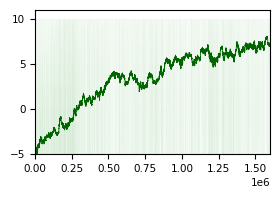

In [ ]:
fig = plt.figure(figsize=set_size(364.999, 0.6))
bax = brokenaxes(xlims=((0, 1.6e6),), ylims=((-5, 11),), hspace=500, despine=False)

# fig.subplots_adjust(bottom=0.05)  
alpha = 0.002

bax.plot(df_1_1['steps'], df_1_1['reward'], alpha=0.25, color='green', linewidth=0.0075)
# bax.plot(df_1_1['steps'], df_1_1['reward'].rolling(window=500).mean(), alpha=1, label='PPO', color='darkgreen')
bax.plot(df_1_1['steps'], df_1_1['reward'].ewm(alpha=alpha).mean(), alpha=1, label='PPO', color='darkgreen', linewidth=0.6)

# fig.subplots_adjust(bottom=0.05)  
bax.plot(df_1['steps'], df_1['reward'], alpha=0.25, color='blue', linewidth=0.005)
# bax.plot(df_1['steps'], df_1['reward'].rolling(window=500).mean(), alpha=1, label='Dreamer', color='darkblue')
bax.plot(df_1['steps'], df_1['reward'].ewm(alpha=alpha).mean(), alpha=1, label="Our's", color='darkblue', linewidth=0.6)


bax.fill_between(df_1_1['steps'], 
                 df_1_1['reward'].ewm(alpha=alpha).mean() - df_1_1['reward'].ewm(alpha=alpha).std()/3,
                 df_1_1['reward'].ewm(alpha=alpha).mean() + df_1_1['reward'].ewm(alpha=alpha).std()/3,
                 color='darkgreen', alpha=0.05)

bax.fill_between(df_1['steps'],
                 df_1['reward'].ewm(alpha=alpha/2).mean() - df_1['reward'].ewm(alpha=alpha/2).std()/3,
                 df_1['reward'].ewm(alpha=alpha/2).mean() + df_1['reward'].ewm(alpha=alpha/2).std()/3,
                 color='darkblue', alpha=0.05)
bax.axhline(y=10, color='green', linestyle='--', alpha=0.7, label="Target reached")
# bax.axhline(y=-2, color='red', linestyle='--', alpha=0.5, label="Crashed")

bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')

bax.last_row[0].set_xticks([0, 0.5e6, 1e6, 1.5e6])
bax.last_row[0].set_xticklabels(['0', '0.5M', '1M','1.5M'])
legend = bax.legend(loc='lower right')
legend.get_frame().set_edgecolor('none')
plt.savefig("comparisons/racetrack_reward_ppo_vs_dreamer_3.png", dpi=900,  bbox_inches='tight')


## Vascular - No Collision

#### Dreamer

In [180]:
from pandas import DataFrame
# path = "dreamer_vascular_no_collision/"
path= f"{PATH_WINDOWS}/dreamer_vascular_no_collision/"
scores = path + '/score.csv'
rates = path + '/rate_target_reached_comb.csv'

df_dreamer = pd.read_csv(scores)
df_1_1: DataFrame = pd.read_csv(rates)

#### PPO

In [181]:
path = PATH_WINDOWS + r"\PPO_vascular"
scores = glob.glob(path + r'\reward*.csv')
scores = natsorted(scores)

scores = list(pd.read_csv(score) for score in scores)
max_ = scores[0].loc[:,"steps"].max()
for score in scores[1:]:
    score["steps"] += max_
    max_ = score.loc[:, "steps"].max()

df_ppo = pd.concat(scores, axis=0).sort_values(by="steps")

#### Score

In [182]:
fig = plt.figure(figsize=set_size(361.34999, 0.6))
bax = brokenaxes(xlims=((0, 1.2e6), (1.2e6, 120e6),), 
                 ylims=((-25, 11),), 
                 wspace=0.050, 
                 width_ratios=[1, 0.8], 
                 despine=False, 
                 d=0.015)
alpha = 0.002
df_1_0 = df_dreamer.copy()
df_2_0 = df_ppo.copy()

df_1_1 = df_1_0[df_1_0['Step'] > 1.45e6]
df_1_0 = df_1_0[df_1_0['Step'] < 1.45e6]
df_2_1 = df_2_0[df_2_0['steps'] > 1.49e6]
df_2_0 = df_2_0[df_2_0['steps'] < 1.49e6]

df_1_0_ewma = df_1_0['Value'].ewm(alpha=alpha).mean()
df_1_1_ewma = df_1_1['Value'].ewm(alpha=alpha).mean()

df_2_0_ewma = df_2_0['reward'].ewm(alpha=alpha).mean()
df_2_1_ewma = df_2_1['reward'].ewm(alpha=alpha).mean()

bax.plot(df_2_0['steps'], df_2_0['reward'], alpha=0.25, color='green', linewidth=0.0045)
bax.plot(df_2_0['steps'], df_2_0_ewma, alpha=1, label='PPO', color='darkgreen', linewidth=0.6)

bax.plot(df_2_1['steps'], df_2_1['reward'], alpha=0.25, color='green', linewidth=0.001)
bax.plot(df_2_1['steps'], df_2_1_ewma, alpha=1, color='darkgreen', linewidth=0.6)

bax.plot(df_1_0['Step'], df_1_0['Value'], alpha=0.25, color='blue', linewidth=0.008)
bax.plot(df_1_0['Step'], df_1_0_ewma, alpha=1, label="Our's", color='darkblue', linewidth=0.6)

bax.fill_between(df_2_0['steps'], 
                 df_2_0['reward'].ewm(alpha=alpha).mean() - df_2_0['reward'].ewm(alpha=alpha).std()/3,
                 df_2_0['reward'].ewm(alpha=alpha).mean() + df_2_0['reward'].ewm(alpha=alpha).std()/3,
                 color='darkgreen', alpha=0.05)

bax.fill_between(df_2_1['steps'],
                 df_2_1['reward'].ewm(alpha=alpha/2).mean() - df_2_1['reward'].ewm(alpha=alpha/2).std()/3,
                 df_2_1['reward'].ewm(alpha=alpha/2).mean() + df_2_1['reward'].ewm(alpha=alpha/2).std()/3,
                 color='darkgreen', alpha=0.05)

bax.fill_between(df_1_0['Step'],
                 df_1_0['Value'].ewm(alpha=alpha/2).mean() - df_1_0['Value'].ewm(alpha=alpha/2).std()/3,
                 df_1_0['Value'].ewm(alpha=alpha/2).mean() + df_1_0['Value'].ewm(alpha=alpha/2).std()/3,
                 color='darkblue', alpha=0.05)

# bax.fill_between(df_1_1['Step'],
#                  df_1_1['Value'].ewm(alpha=alpha/2).mean() - df_1_1['Value'].ewm(alpha=alpha/2).std()/3,
#                  df_1_1['Value'].ewm(alpha=alpha/2).mean() + df_1_1['Value'].ewm(alpha=alpha/2).std()/3,
#                  color='darkblue', alpha=0.05)

bax.axhline(y=10, color='green', linestyle='--', alpha=0.7, label="Target reached")


bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')

bax.last_row[0].set_xticks([0, 0.5e6, 1e6,])
bax.last_row[0].set_xticklabels(['0', '0.5M', '1M',])
bax.last_row[1].set_xticks([10e6, 50e6, 100e6,])
bax.last_row[1].set_xticklabels(['10M', '50M','100M',])
legend = bax.legend(loc='lower right')
legend.get_frame().set_edgecolor('none')
plt.savefig('score_dreamer_ppo_vascular_no_collision', dpi=900, bbox_inches='tight')


## SPA

### Dfs

In [183]:
from natsort import natsorted

# PPO
path_reward = rf"{PATH_WINDOWS}/ppo_spa/"
path_target_reached = rf'{PATH_WINDOWS}/ppo_spa/'

reward = glob.glob(path_reward + '/*reward*.csv')
rates = glob.glob(path_target_reached + '/*rate*.csv')

reward = natsorted(reward)
rates = natsorted(rates)

scores = list(pd.read_csv(score) for score in reward)
max_ = scores[0].loc[:,"steps"].max()
for score in scores[1:]:
    score["steps"] += max_
    max_ = score.loc[:, "steps"].max()

df_ppo_reward = pd.concat(scores, axis=0).sort_values(by="steps")

rewards = [pd.read_csv(f) for f in reward]
# for i, df in enumerate(dfs):
#     if i > 0:
#         dfs[i]['steps'] = dfs[i]['steps'] + dfs[i-1]['steps'].max() 
# df = pd.concat(dfs, axis=0)
# df_ppo_reward = df

dfs = [pd.read_csv(f) for f in rates]
for i, df in enumerate(dfs):
    if i > 0:
        dfs[i]['steps'] = dfs[i]['steps'] + dfs[i-1]['steps'].max()
df_2 = pd.concat(dfs, axis=0)
df_ppo_rate = df_2.sort_values(by='steps')


# Dreamer
path_2 = f"{PATH_WINDOWS}/spa_by_wall/"
reward = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in reward]
df = pd.concat(dfs, axis=0)

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)

df_1_2 = df
df_2_2 = df_2

df_dreamer_reward = df_1_2.sort_values(by='steps')
df_dreamer_rate = df_2_2.sort_values(by='steps')

# Shifting extra
df_dreamer_reward = df_dreamer_reward.shift(-1000)
df_dreamer_reward["steps"] = df_dreamer_reward["steps"] - df_dreamer_reward["steps"].min()

### Plot

In [184]:
df_1 = df_ppo_reward[df_ppo_reward['steps'] < 0.7e6]
df_2 = df_ppo_reward[df_ppo_reward['steps'] > 0.7e6]

ddf_dreamer_reward_1 = df_dreamer_reward[df_dreamer_reward['steps'] < 0.7e6]
ddf_dreamer_reward_2 = df_dreamer_reward[df_dreamer_reward['steps'] > 0.7e6]

fig = plt.figure(figsize=set_size(361.34999, 0.6))
bax = brokenaxes(xlims=((0, 0.7e6),(5e6, 100e6)), 
                 ylims=((-25, 11),),
                 wspace=0.050,
                 hspace=0.050,
                 width_ratios=[1,0.8], 
                 despine=False, 
                 d=0.015)
alpha = 0.002  # Increase alpha for faster plotting

# Calculate EWMA
ppo_ewma = df_ppo_reward['reward'].ewm(alpha=alpha).mean()
dreamer_ewma = df_dreamer_reward['reward'].ewm(alpha=alpha).mean()
ppo_ewma_1 = df_1['reward'].ewm(alpha=alpha).mean()
ppo_ewma_2 = df_2['reward'].ewm(alpha=alpha).mean()

bax.plot(df_1['steps'], df_1['reward'], alpha=0.25, color='green', linewidth=0.02)
bax.plot(df_1['steps'], ppo_ewma_1, alpha=1, label='PPO', color='darkgreen', linewidth = 0.6)

bax.plot(df_2['steps'], df_2['reward'], alpha=0.25, color='green', linewidth=0.002)
bax.plot(df_2['steps'], ppo_ewma_2, alpha=1, color='darkgreen', linewidth = 0.6)

bax.plot(df_dreamer_reward['steps'], df_dreamer_reward['reward'], alpha=0.25, color='blue', linewidth=0.01)
bax.plot(df_dreamer_reward['steps'], dreamer_ewma, alpha=1, label="Our's", color='darkblue', linewidth = 0.6)

# Calculate 1/3 standard deviation
ppo_std = df_ppo_reward['reward'].ewm(alpha=alpha).std() / 3
dreamer_std = df_dreamer_reward['reward'].ewm(alpha=alpha).std() / 3

# Plot filled area
bax.fill_between(df_ppo_reward['steps'], ppo_ewma - ppo_std, ppo_ewma + ppo_std, color='green', alpha=0.02)
bax.fill_between(df_dreamer_reward['steps'], dreamer_ewma - dreamer_std, dreamer_ewma + dreamer_std, color='blue', alpha=0.02)

bax.axhline(y=10, color='green', linestyle='--', alpha=0.7, label="Target reached")


bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')
# bax.set_title("Comparison Flow Strenght", fontsize=20)

bax.last_row[0].set_xticks([0, 200e3, 400e3, 600e3, ])
bax.last_row[0].set_xticklabels(['0', '200K', '400K', '600K', ])
bax.last_row[1].set_xticks([10e6, 50e6, 95e6])
bax.last_row[1].set_xticklabels(['10M', '50M','100M'])

legend = bax.legend(loc='lower right')
legend.get_frame().set_edgecolor('none')

fig.savefig('spa_comparison.png', format='png', bbox_inches='tight', dpi=900)

# plt.savefig('spa_comparison', dpi=300, bbox_inches='tight')

## 4 Output

### Setup

In [71]:
### PPO
path_reward = Path(rf"{PATH_WINDOWS}/PPO_4_out/reward_train_0.csv")
path_target_reached = Path(rf'{PATH_WINDOWS}/PPO_4_out/rate_target_reached_train.csv').as_posix()

df_ppo = pd.read_csv(path_reward).sort_values(by="steps")
df_2_1 = pd.read_csv(path_target_reached)

### Dreamer
path_2 = f"{PATH_WINDOWS}/4_out_flow/"
scores = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in scores]
df = pd.concat(dfs, axis=0)

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)

df_dreamer = df
df_2_2 = df_2

df_dreamer = df_dreamer.sort_values(by='steps')
df_2_2 = df_2_2.sort_values(by='steps')

# Shifting extra
df_dreamer = df_dreamer.shift(-1000)
df_dreamer["steps"] = df_dreamer["steps"] - df_dreamer["steps"].min()

### Plot

In [72]:
fig = plt.figure(figsize=set_size(361.34999, 0.6))
bax = brokenaxes(xlims=((0, 0.7e6), (0.7e6, 55e6),), 
                 ylims=((-15, 11),), 
                 wspace=0.050, 
                 width_ratios=[1, 0.8], 
                 despine=False, 
                 d=0.015)
alpha = 0.002

df_ppo_0 = df_ppo[df_ppo['steps'] < 0.7e6]
df_ppo_1 = df_ppo[df_ppo['steps'] > 0.7e6]

bax.plot(df_ppo_0['steps'], df_ppo_0['reward'], alpha=0.25, color='green', linewidth=0.015)
bax.plot(df_ppo_0['steps'], df_ppo_0['reward'].ewm(alpha=alpha).mean(), alpha=1, label='PPO', color='darkgreen', linewidth=0.6)

bax.plot(df_ppo_1['steps'], df_ppo_1['reward'], alpha=0.25, color='green', linewidth=0.0001)
bax.plot(df_ppo_1['steps'], df_ppo_1['reward'].ewm(alpha=alpha/4).mean(), alpha=1,color='darkgreen', linewidth=0.6)

bax.plot(df_dreamer['steps'], df_dreamer['reward'], alpha=0.25, color='blue', linewidth=0.015)
bax.plot(df_dreamer['steps'], df_dreamer['reward'].ewm(alpha=alpha/2).mean(), alpha=1, label="Our's", color='darkblue', linewidth=0.6)


bax.fill_between(df_ppo['steps'], 
                 df_ppo['reward'].ewm(alpha=alpha).mean() - df_ppo['reward'].ewm(alpha=alpha).std()/3,
                 df_ppo['reward'].ewm(alpha=alpha).mean() + df_ppo['reward'].ewm(alpha=alpha).std()/3,
                 color='darkgreen', alpha=0.05)

bax.fill_between(df_dreamer['steps'],
                 df_dreamer['reward'].ewm(alpha=alpha/2).mean() - df_dreamer['reward'].ewm(alpha=alpha/2).std()/3,
                 df_dreamer['reward'].ewm(alpha=alpha/2).mean() + df_dreamer['reward'].ewm(alpha=alpha/2).std()/3,
                 color='darkblue', alpha=0.05)

bax.axhline(y=10, color='green', linestyle='--', alpha=0.7, label="Target reached")

bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')

bax.last_row[0].set_xticks([0, 0.2e6, 0.4e6, 0.6e6])
bax.last_row[0].set_xticklabels(['0', '200k', '400k', '600k'])
bax.last_row[1].set_xticks([10e6, 30e6, 50e6])
bax.last_row[1].set_xticklabels(['10M', '30M', '50M'])

legend = bax.legend(loc='lower right')
legend.get_frame().set_edgecolor('none')
plt.savefig('score_dreamer_ppo_4_out_tris', dpi=900, bbox_inches='tight')

# Hyper_par_PPO vs Dreamer

## Hyper_par_Racetrack

### Dreamer

In [110]:
# path_1 = "dreamer_racetrack_collision/"
path_1 = f"{PATH_WINDOWS}/dreamer_racetrack_collision/"

scores = glob.glob(path_1 + '/*reward*.csv')
rates = glob.glob(path_1 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in scores]
df_1 = pd.concat(dfs, axis=0)
df_1.sort_values(by='steps', inplace=True)
df_1['steps'] = df_1['steps']*3

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)
df_2.sort_values(by='steps', inplace=True)
df_2['steps'] = df_2['steps']*3

### PPO

In [ ]:

# path_2 = "PPO_racetrack_collision/" 
path_2 = PATH_WINDOWS + r"\PPO_racetrack_collision\"
# path_2 = "PPO_vascular_no_collision/" 
scores = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')
df_1_1 = pd.read_csv([score for score in scores if "train" in score][0])
df_2_1 = pd.read_csv([rate for rate in rates if "train" in rate][0])

### Score

In [114]:
fig = plt.figure(figsize=set_size(364.999, 0.6))
bax = brokenaxes(xlims=((0, 1.6e6),), ylims=((-5, 11),), hspace=500, despine=False)

# fig.subplots_adjust(bottom=0.05)  
alpha = 0.002

bax.plot(df_1_1['steps'], df_1_1['reward'], alpha=0.25, color='green', linewidth=0.0075)
# bax.plot(df_1_1['steps'], df_1_1['reward'].rolling(window=500).mean(), alpha=1, label='PPO', color='darkgreen')
bax.plot(df_1_1['steps'], df_1_1['reward'].ewm(alpha=alpha).mean(), alpha=1, label='PPO', color='darkgreen', linewidth=0.6)

# fig.subplots_adjust(bottom=0.05)  
bax.plot(df_1['steps'], df_1['reward'], alpha=0.25, color='blue', linewidth=0.005)
# bax.plot(df_1['steps'], df_1['reward'].rolling(window=500).mean(), alpha=1, label='Dreamer', color='darkblue')
bax.plot(df_1['steps'], df_1['reward'].ewm(alpha=alpha).mean(), alpha=1, label="Our's", color='darkblue', linewidth=0.6)


bax.fill_between(df_1_1['steps'], 
                 df_1_1['reward'].ewm(alpha=alpha).mean() - df_1_1['reward'].ewm(alpha=alpha).std()/3,
                 df_1_1['reward'].ewm(alpha=alpha).mean() + df_1_1['reward'].ewm(alpha=alpha).std()/3,
                 color='darkgreen', alpha=0.05)

bax.fill_between(df_1['steps'],
                 df_1['reward'].ewm(alpha=alpha/2).mean() - df_1['reward'].ewm(alpha=alpha/2).std()/3,
                 df_1['reward'].ewm(alpha=alpha/2).mean() + df_1['reward'].ewm(alpha=alpha/2).std()/3,
                 color='darkblue', alpha=0.05)
bax.axhline(y=10, color='green', linestyle='--', alpha=0.7, label="Target reached")
# bax.axhline(y=-2, color='red', linestyle='--', alpha=0.5, label="Crashed")

bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')

bax.last_row[0].set_xticks([0, 0.5e6, 1e6, 1.5e6])
bax.last_row[0].set_xticklabels(['0', '0.5M', '1M','1.5M'])
legend = bax.legend(loc='lower right')
legend.get_frame().set_edgecolor('none')
plt.savefig("racetrack_reward_ppo_vs_dreamer_3.png", dpi=900,  bbox_inches='tight')


## Hyper_par_Vascular - No Collision

#### Dreamer

In [314]:
from pandas import DataFrame
# path = "dreamer_vascular_no_collision/"
path= f"{PATH_WINDOWS}/dreamer_vascular_no_collision/"
scores = path + '/score.csv'
rates = path + '/rate_target_reached_comb.csv'

df_dreamer = pd.read_csv(scores)
df_1_1: DataFrame = pd.read_csv(rates)

#### PPO

In [315]:
# path = PATH_WINDOWS + r"\PPO_Tuned_results\PPOtuned_vascular"
# scores = glob.glob(path + r'\reward*.csv')
# scores = natsorted(scores)

# scores = list(pd.read_csv(score) for score in scores)
# max_ = scores[0].loc[:,"steps"].max()
# for score in scores[1:]:
#     score["steps"] += max_
#     max_ = score.loc[:, "steps"].max()

# df_ppo = pd.concat(scores, axis=0).sort_values(by="steps")
df_ppo = pd.read_csv(r'C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\PPOtuned_vascular\20241207_1953_reward.csv')
df_ppo['steps'] *= 14  # parellel envs

#### Score

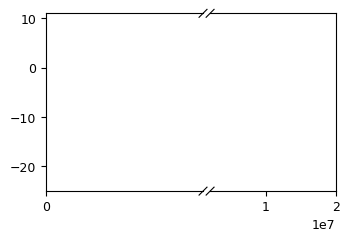

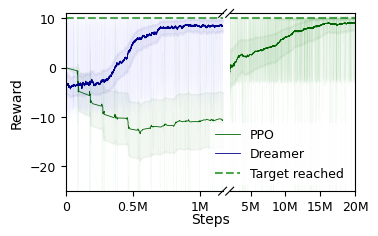

In [316]:
fig = plt.figure(figsize=set_size(300, 0.9))
bax = brokenaxes(xlims=((0, 1.4e6), (2e6, 20e6),), 
                 ylims=((-25, 11),), 
                 wspace=0.050, 
                 width_ratios=[1, 0.8], 
                 despine=False, 
                 d=0.015)
alpha = 0.002
df_1_0 = df_dreamer.copy()
df_2_0 = df_ppo.copy()

df_1_1 = df_1_0[df_1_0['Step'] > 1.45e6]
df_1_0 = df_1_0[df_1_0['Step'] < 1.45e6]
df_2_1 = df_2_0[df_2_0['steps'] > 1.49e6]
df_2_0 = df_2_0[df_2_0['steps'] < 1.49e6]

df_1_0_ewma = df_1_0['Value'].ewm(alpha=alpha).mean()
df_1_1_ewma = df_1_1['Value'].ewm(alpha=alpha).mean()

df_2_0_ewma = df_2_0['reward'].ewm(alpha=alpha).mean()
df_2_1_ewma = df_2_1['reward'].ewm(alpha=alpha).mean()

bax.plot(df_2_0['steps'], df_2_0['reward'], alpha=0.25, color='green', linewidth=0.05)
bax.plot(df_2_0['steps'], df_2_0_ewma, alpha=1, label='PPO', color='darkgreen', linewidth=0.6)

bax.plot(df_2_1['steps'], df_2_1['reward'], alpha=0.25, color='green', linewidth=0.03)
bax.plot(df_2_1['steps'], df_2_1_ewma, alpha=1, color='darkgreen', linewidth=0.6)

bax.plot(df_1_0['Step'], df_1_0['Value'], alpha=0.25, color='blue', linewidth=0.008)
bax.plot(df_1_0['Step'], df_1_0_ewma, alpha=1, label="Dreamer", color='darkblue', linewidth=0.6)

bax.fill_between(df_2_0['steps'], 
                 df_2_0['reward'].ewm(alpha=alpha).mean() - df_2_0['reward'].ewm(alpha=alpha).std()/3,
                 df_2_0['reward'].ewm(alpha=alpha).mean() + df_2_0['reward'].ewm(alpha=alpha).std()/3,
                 color='darkgreen', alpha=0.05)

bax.fill_between(df_2_1['steps'],
                 df_2_1['reward'].ewm(alpha=alpha/2).mean() - df_2_1['reward'].ewm(alpha=alpha/2).std()/3,
                 df_2_1['reward'].ewm(alpha=alpha/2).mean() + df_2_1['reward'].ewm(alpha=alpha/2).std()/3,
                 color='darkgreen', alpha=0.05)

bax.fill_between(df_1_0['Step'],
                 df_1_0['Value'].ewm(alpha=alpha/2).mean() - df_1_0['Value'].ewm(alpha=alpha/2).std()/3,
                 df_1_0['Value'].ewm(alpha=alpha/2).mean() + df_1_0['Value'].ewm(alpha=alpha/2).std()/3,
                 color='darkblue', alpha=0.05)

# bax.fill_between(df_1_1['Step'],
#                  df_1_1['Value'].ewm(alpha=alpha/2).mean() - df_1_1['Value'].ewm(alpha=alpha/2).std()/3,
#                  df_1_1['Value'].ewm(alpha=alpha/2).mean() + df_1_1['Value'].ewm(alpha=alpha/2).std()/3,
#                  color='darkblue', alpha=0.05)

bax.axhline(y=10, color='green', linestyle='--', alpha=0.7, label="Target reached")


bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')

bax.last_row[0].set_xticks([0, 0.6e6, 1.2e6,])
bax.last_row[0].set_xticklabels(['0', '0.5M', '1M',])
bax.last_row[1].set_xticks([5e6, 10e6, 15e6, 20e6])
bax.last_row[1].set_xticklabels(['5M', '10M','15M','20M'])
legend = bax.legend(loc='lower right')
legend.get_frame().set_edgecolor('none')
plt.savefig('score_dreamer_ppo_vascular_no_collision', dpi=900, bbox_inches='tight')
plt.show()

## Hyper_par_SPA

### Dfs

In [289]:
from natsort import natsorted

# PPO
# path_reward = rf"{PATH_WINDOWS}/ppo_spa/"
# path_target_reached = rf'{PATH_WINDOWS}/ppo_spa/'

# reward = glob.glob(path_reward + '/*reward*.csv')
# rates = glob.glob(path_target_reached + '/*rate*.csv')

# reward = natsorted(reward)
# rates = natsorted(rates)

# scores = list(pd.read_csv(score) for score in reward)
# max_ = scores[0].loc[:,"steps"].max()
# for score in scores[1:]:
#     score["steps"] += max_
#     max_ = score.loc[:, "steps"].max()

# df_ppo_reward = pd.concat(scores, axis=0).sort_values(by="steps")

# rewards = [pd.read_csv(f) for f in reward]
# # for i, df in enumerate(dfs):
# #     if i > 0:
# #         dfs[i]['steps'] = dfs[i]['steps'] + dfs[i-1]['steps'].max() 
# # df = pd.concat(dfs, axis=0)
# # df_ppo_reward = df

# dfs = [pd.read_csv(f) for f in rates]
# for i, df in enumerate(dfs):
#     if i > 0:
#         dfs[i]['steps'] = dfs[i]['steps'] + dfs[i-1]['steps'].max()
# df_2 = pd.concat(dfs, axis=0)
# df_ppo_rate = df_2.sort_values(by='steps')
df_ppo_reward = pd.read_csv(r'C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\PPOtuned_spa\20241208_0754_reward.csv')
df_ppo_reward['steps'] *= 14  # parellel envs

# Dreamer
path_2 = f"{PATH_WINDOWS}/spa_by_wall/"
reward = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in reward]
df = pd.concat(dfs, axis=0)

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)

df_1_2 = df
df_2_2 = df_2

df_dreamer_reward = df_1_2.sort_values(by='steps')
df_dreamer_rate = df_2_2.sort_values(by='steps')

# Shifting extra
df_dreamer_reward = df_dreamer_reward.shift(-1000)
df_dreamer_reward["steps"] = df_dreamer_reward["steps"] - df_dreamer_reward["steps"].min()

### Plot

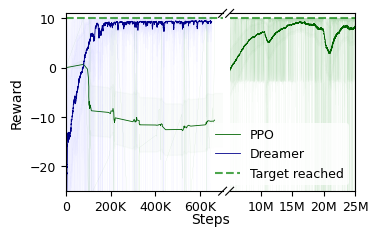

In [312]:
df_1 = df_ppo_reward[df_ppo_reward['steps'] < 0.7e6]
df_2 = df_ppo_reward[df_ppo_reward['steps'] > 0.7e6]

ddf_dreamer_reward_1 = df_dreamer_reward[df_dreamer_reward['steps'] < 0.7e6]
ddf_dreamer_reward_2 = df_dreamer_reward[df_dreamer_reward['steps'] > 0.7e6]

fig = plt.figure(figsize=set_size(300, 0.9))
# fig = plt.figure(figsize=(4, 1.5))
bax = brokenaxes(xlims=((0, 0.7e6),(5e6, 25e6)), 
                 ylims=((-25, 11),),
                 wspace=0.050,
                 hspace=0.050,
                 width_ratios=[1,0.8], 
                 despine=False, 
                 d=0.015)
alpha = 0.002  # Increase alpha for faster plotting

# Calculate EWMA
ppo_ewma = df_ppo_reward['reward'].ewm(alpha=alpha).mean()
dreamer_ewma = df_dreamer_reward['reward'].ewm(alpha=alpha).mean()
ppo_ewma_1 = df_1['reward'].ewm(alpha=alpha).mean()
ppo_ewma_2 = df_2['reward'].ewm(alpha=alpha).mean()


bax.plot(df_1['steps'], df_1['reward'], alpha=0.25, color='green', linewidth=0.1)
bax.plot(df_1['steps'], ppo_ewma_1, alpha=1, label='PPO', color='darkgreen', linewidth = 0.6)

bax.plot(df_2['steps'], df_2['reward'], alpha=0.25, color='green', linewidth=0.03)
bax.plot(df_2['steps'], ppo_ewma_2, alpha=1, color='darkgreen', linewidth = 0.6)

bax.plot(df_dreamer_reward['steps'], df_dreamer_reward['reward'], alpha=0.25, color='blue', linewidth=0.01)
bax.plot(df_dreamer_reward['steps'], dreamer_ewma, alpha=1, label="Dreamer", color='darkblue', linewidth = 0.6)

# Calculate 1/3 standard deviation
ppo_std = df_ppo_reward['reward'].ewm(alpha=alpha).std() / 3
dreamer_std = df_dreamer_reward['reward'].ewm(alpha=alpha).std() / 3

# Plot filled area
bax.fill_between(df_ppo_reward['steps'], ppo_ewma - ppo_std, ppo_ewma + ppo_std, color='green', alpha=0.02)
bax.fill_between(df_dreamer_reward['steps'], dreamer_ewma - dreamer_std, dreamer_ewma + dreamer_std, color='blue', alpha=0.02)

bax.axhline(y=10, color='green', linestyle='--', alpha=0.7, label="Target reached")


bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')
# bax.set_title("Comparison Flow Strenght", fontsize=20)

bax.last_row[0].set_xticks([0, 200e3, 400e3, 600e3, ])
bax.last_row[0].set_xticklabels(['0', '200K', '400K', '600K', ])
# bax.last_row[1].set_xticks([10e6, 20e6, 30e6])
# bax.last_row[1].set_xticklabels(['10M', '20M','30M'])

bax.last_row[1].set_xticks([10e6, 15e6, 20e6, 25e6])
bax.last_row[1].set_xticklabels(['10M', '15M','20M','25M'])

legend = bax.legend(loc='lower right')
legend.get_frame().set_edgecolor('none')

fig.savefig('spa_comparison.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

# plt.savefig('spa_comparison', dpi=300, bbox_inches='tight')

## Hyper_par_4 Output

### Setup

In [307]:
### PPO
# path_reward = Path(rf"{PATH_WINDOWS}/PPO_4_out/reward_train_0.csv")
# path_target_reached = Path(rf'{PATH_WINDOWS}/PPO_4_out/rate_target_reached_train.csv').as_posix()

# df_ppo = pd.read_csv(path_reward).sort_values(by="steps")
# df_2_1 = pd.read_csv(path_target_reached)

# df_ppo = pd.read_csv(r'C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\Vascular Multioutput\20250212_2116_vascular_multiout_segmented_reward.csv')
# df_ppo['steps'] *= 14  # parellel envs

df_ppo = pd.read_csv(r'C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\Vascular Multioutput\edited_vascular_4out.csv')
df_ppo['steps'] *= 14  # parellel envs

### Dreamer
path_2 = f"{PATH_WINDOWS}/4_out_flow/"
scores = glob.glob(path_2 + '/*reward*.csv')
rates = glob.glob(path_2 + '/*rate*.csv')

dfs = [pd.read_csv(f) for f in scores]
df = pd.concat(dfs, axis=0)

dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0)

df_dreamer = df
df_2_2 = df_2

df_dreamer = df_dreamer.sort_values(by='steps')
df_2_2 = df_2_2.sort_values(by='steps')

# Shifting extra
df_dreamer = df_dreamer.shift(-1000)
df_dreamer["steps"] = df_dreamer["steps"] - df_dreamer["steps"].min()

### Plot

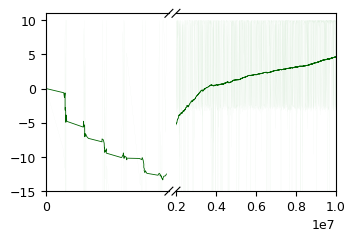

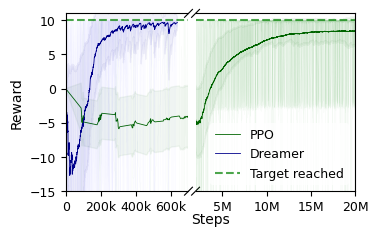

In [308]:
# fig = plt.figure(figsize=set_size(361.34999, 0.6))
fig = plt.figure(figsize=set_size(300, 0.9))
bax = brokenaxes(xlims=((0, 0.7e6), (2e6, 10e6),), 
                 ylims=((-15, 11),), 
                 wspace=0.050, 
                 width_ratios=[1, 1.3], 
                 despine=False, 
                 d=0.015)
alpha = 0.002

df_ppo_0 = df_ppo[df_ppo['steps'] < 0.7e6]
df_ppo_1 = df_ppo[df_ppo['steps'] > 0.7e6]

bax.plot(df_ppo_0['steps'], df_ppo_0['reward'], alpha=0.25, color='green', linewidth=0.03)
bax.plot(df_ppo_0['steps'], df_ppo_0['reward'].ewm(alpha=alpha).mean(), alpha=1, label='PPO', color='darkgreen', linewidth=0.6)

bax.plot(df_ppo_1['steps'], df_ppo_1['reward'], alpha=0.25, color='green', linewidth=0.03)
bax.plot(df_ppo_1['steps'], df_ppo_1['reward'].ewm(alpha=alpha/4).mean(), alpha=1,color='darkgreen', linewidth=0.6)

bax.plot(df_dreamer['steps'], df_dreamer['reward'], alpha=0.25, color='blue', linewidth=0.015)
bax.plot(df_dreamer['steps'], df_dreamer['reward'].ewm(alpha=alpha/2).mean(), alpha=1, label="Dreamer", color='darkblue', linewidth=0.6)


bax.fill_between(df_ppo['steps'], 
                 df_ppo['reward'].ewm(alpha=alpha).mean() - df_ppo['reward'].ewm(alpha=alpha).std()/3,
                 df_ppo['reward'].ewm(alpha=alpha).mean() + df_ppo['reward'].ewm(alpha=alpha).std()/3,
                 color='darkgreen', alpha=0.05)

bax.fill_between(df_dreamer['steps'],
                 df_dreamer['reward'].ewm(alpha=alpha/2).mean() - df_dreamer['reward'].ewm(alpha=alpha/2).std()/3,
                 df_dreamer['reward'].ewm(alpha=alpha/2).mean() + df_dreamer['reward'].ewm(alpha=alpha/2).std()/3,
                 color='darkblue', alpha=0.05)

bax.axhline(y=10, color='green', linestyle='--', alpha=0.7, label="Target reached")

bax.tick_params(axis='both', which='major')
bax.set_xlabel('Steps')
bax.set_ylabel('Reward')

bax.last_row[0].set_xticks([0, 0.2e6, 0.4e6, 0.6e6])
bax.last_row[0].set_xticklabels(['0', '200k', '400k', '600k'])
bax.last_row[1].set_xticks([5e6, 10e6, 15e6, 20e6])
bax.last_row[1].set_xticklabels(['5M', '10M', '15M', '20M'])

legend = bax.legend(loc='lower right')
legend.get_frame().set_edgecolor('none')
# 
plt.savefig('score_dreamer_ppo_4_out_tris', dpi=900, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

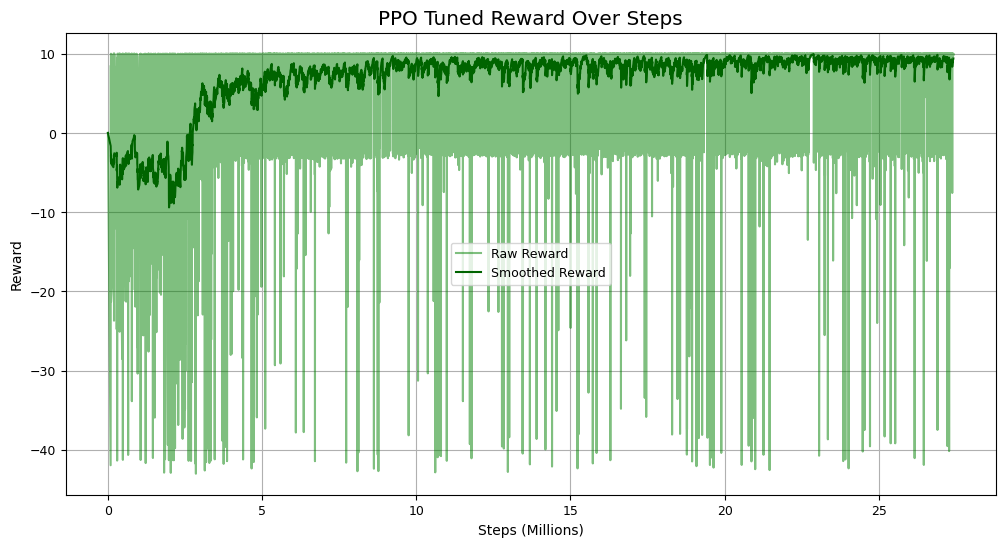

In [282]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the specified path
df_ppo_tuned_new = pd.read_csv(r'C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\Vascular Multioutput\edited_vascular_4out.csv')

# Adjust the steps by multiplying by 14
df_ppo_tuned_new['steps'] *= 14

# Sort the DataFrame by 'steps' to ensure data is in ascending order
df_ppo_tuned_new.sort_values('steps', inplace=True)

# Calculate the Exponential Moving Average (EMA) for the reward data
df_ppo_tuned_new['EMA'] = df_ppo_tuned_new['reward'].ewm(span=50, adjust=False).mean()

# Create the plot for the tuned data
plt.figure(figsize=(12, 6))
plt.plot(df_ppo_tuned_new['steps'] / 1e6, df_ppo_tuned_new['reward'], label='Raw Reward', color='green', alpha=0.5)
plt.plot(df_ppo_tuned_new['steps'] / 1e6, df_ppo_tuned_new['EMA'], label='Smoothed Reward', color='darkgreen')
plt.xlabel('Steps (Millions)')
plt.ylabel('Reward')
plt.title('PPO Tuned Reward Over Steps')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Hyper_par_PPO vs Dreamer rate_target_reached

In [541]:
# path = r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\dreamer_racetrack_collision"
# rates = glob.glob(path + r'\*rate*.csv')
# dfs = [pd.read_csv(f) for f in rates]
# df_dreamer_racetrack = pd.concat(dfs, axis=0).sort_values(by='steps')
# df_dreamer_racetrack =df_dreamer_racetrack.sample(400).tail(50)

df_dreamer_racetrack = pd.read_csv(r"CSVs\CSVs\racetrack_frame_skip_4\rate_target_reached_env_0.csv")
df_dreamer_racetrack = df_dreamer_racetrack.sample(400).tail(20)

df_ppo_racetrack = pd.read_csv(r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\tuned_new_envs_6_racetrack\20250217_1920_default_mask_racetrack_segmented_rate_target_reached.csv")
df_ppo_racetrack = df_ppo_racetrack.sample(400).tail(50)


path = rf"{CSV_PATH}\4_out_flow"
rates = glob.glob(path + r'\*rate*.csv')
dfs = [pd.read_csv(f) for f in rates]
df_dreamer_4_out = pd.concat(dfs, axis=0).sort_values(by='steps')
df_dreamer_4_out = df_dreamer_4_out.sample(400).tail(50)

df_ppo_4_out = pd.read_csv(r"CSVs\CSVs\PPO_Tuned_results\Vascular Multioutput\20250212_2116_vascular_multiout_segmented_rate_target_reached.csv")
df_ppo_4_out = df_ppo_4_out.sample(500).tail(50)

path_2 = r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\spa_by_wall"
rates = glob.glob(path_2 + r'\*rate*.csv')
dfs = [pd.read_csv(f) for f in rates]
df_2 = pd.concat(dfs, axis=0).sort_values(by='steps')
df_dreamer_spa = df_2.sample(500).tail(50)

df_ppo_spa = pd.read_csv(r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\PPOtuned_spa\20241208_0754_rate_target_reached.csv")
df_ppo_spa = df_ppo_spa.sample(500).tail(50)

path_3 = r"C:\Users\M4\Downloads\post_processing\fig_3\dreamer_9_squares_collision"
tg_reach = sorted(glob.glob(path_3 + '/*rate_target_reached_*.csv'))
dfs = [pd.read_csv(f) for f in tg_reach]
df_3_1 = pd.concat(dfs, axis=0).sort_values(by='steps')
df_dreamer_9_squares = df_3_1.tail(50)

df_ppo_9_squares = pd.read_csv(r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\9 Squares\20250213_0917_closing_cleaned_rate_target_reached.csv")
df_ppo_9_squares = df_ppo_9_squares.sample(500).tail(50)


df_dreamer_vascular = pd.read_csv(r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\dreamer_vascular_no_collision\rate_target_reached_comb.csv")
df_dreamer_vascular = df_dreamer_vascular.sample(400).tail(50)

df_ppo_vascular = pd.read_csv(r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\PPOtuned_vascular\20241207_1953_rate_target_reached.csv")
df_ppo_vascular = df_ppo_vascular.sample(400).tail(50)

df_ppo_maze = pd.read_csv(r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\PPO_Tuned_results\Maze\20250212_0915_maze_hard_segmented_rate_target_reached.csv")
df_ppo_maze = df_ppo_maze.sample(400).tail(50)

df_dreamer_maze = pd.read_csv(r"C:\Users\M4\Downloads\Plotting_paper\CSVs\CSVs\Maze Mix No Collision\rate_target_reached_env_2.csv")
df_dreamer_maze = df_dreamer_maze.tail(50)

In [542]:
names = [("Racetrack", "PPO (HP)"), ("Racetrack", "Dreamer"), 
         ("Squares", "PPO (HP)"), ("Squares", "Dreamer"), 
         ("4 Out", "PPO (HP)"), ("4 Out", "Dreamer"),
         ("SPA", "PPO (HP)"), ("SPA", "Dreamer"),
         ("Vascular", "PPO (HP)"), ("Vascular", "Dreamer"), 
         ("Maze", "PPO (HP)"), ("Maze", "Dreamer")]
labels = ["Environment", "Network"] 

In [543]:
df_glob = pd.concat([df_ppo_racetrack, df_dreamer_racetrack, 
                                df_ppo_9_squares, df_dreamer_9_squares,
                                df_ppo_4_out, df_dreamer_4_out,
                                df_ppo_spa, df_dreamer_spa,
                                df_ppo_vascular, df_dreamer_vascular,
                                df_ppo_maze, df_dreamer_maze,
                                ],
                                axis=0, keys=names, names=labels,)

df_glob_ = df_glob.reset_index()

In [544]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df_glob_ = df_glob_.groupby('Environment').apply(lambda x: remove_outliers(x, 'rate_target_reached')).reset_index(drop=True)

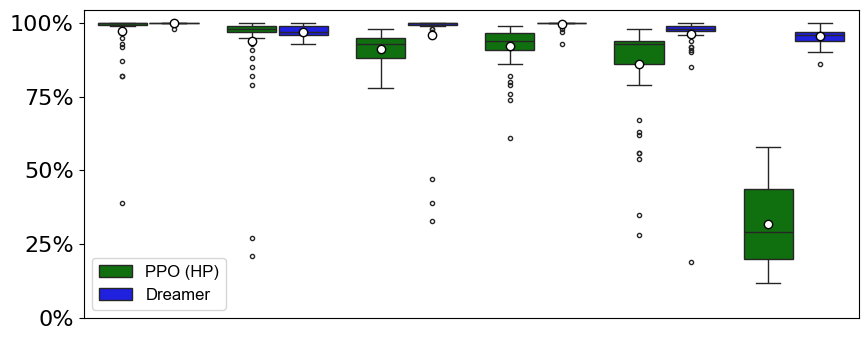

In [555]:
fig = plt.figure(figsize=(10, 4))
color_dict = {'PPO (HP)': 'green', 'Dreamer': 'blue', 'Network': 'green'}
boxplot = sns.boxplot(x='Environment', y='rate_target_reached', data=df_glob, hue='Network', gap=0.05, 
            palette=color_dict, orient='v', linewidth=1, fliersize=3, width=0.8, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis='both', which='major', labelsize=16)

# plt.xlabel('Environments', fontname='Arial', fontsize=12)
# plt.ylabel('Rate Target Reached', fontname='Arial', fontsize=12)
plt.legend(prop={'family': 'Arial', 'size': 12})
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.xticks([])
# boxplot.axes.set_xticks([0, 1, 2, 3, 4, 5])
plt.xlabel(None)
plt.ylabel(None)
# boxplot.legend_.remove()
# plt.xlabel('Rate Target Reached', fontname='Arial', fontsize=16, labelpad=10)
# plt.yscale(['0%', '25%', '50%', '75%', '100%'])
plt.savefig("boxplot_rate_target_reached_2", dpi=300, bbox_inches='tight',)
plt.show()